In [1]:
import os

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Success: Connected to Apple GPU via Metal!")
else:
    device = torch.device("cpu")
    print("MPS not available. Using CPU.")

Success: Connected to Apple GPU via Metal!


# Download CIFAR 10

In [4]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/gdrive')
  directory_path = r"/content/gdrive/MyDrive/PickledModels/FML_Proj"
else:
  directory_path = r"pickled/"

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
trainloader

In [8]:
iter(trainloader)

In [46]:
# !pip install matplotlib

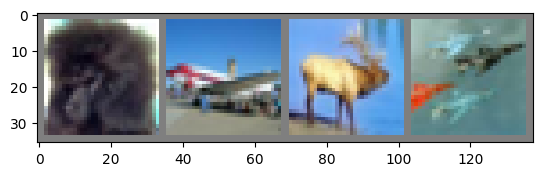

dog   plane deer  plane


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [48]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

# Very Basic CNN Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:



class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

- Loss Function - Cross Entropy
- Optimiser - SGD


In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Model Training

In [ ]:
for epoch in range(2):  #10, 50, 100

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # print(f"Current GPU Memory: {torch.mps.current_allocated_memory() / 1e9:.2f} GB")

        # # Print the peak memory used since the program started
        # print(f"Peak GPU Memory: {torch.mps.driver_allocated_memory() / 1e9:.2f} GB")
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print stats
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.01 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0.03 GB
Current GPU Memory: 0.00 GB
Peak GPU Memory: 0

In [17]:
PATH = os.path.join(directory_path,'cifar_net.pth' )
torch.save(net.state_dict(), PATH)

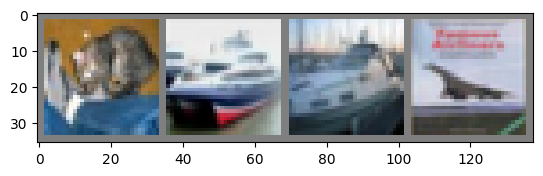

GroundTruth:  cat   ship  ship  plane


In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
# print images
imshow(torchvision.utils.make_grid(images).cpu())
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [23]:
outputs = net(images)

In [24]:
outputs

tensor([[-1.0774, -1.9744,  0.7005,  2.5347, -0.4606,  1.8071,  2.0715, -1.1534,
         -0.4851, -1.3466],
        [ 7.5963,  5.4745, -2.3325, -4.4696, -3.9627, -5.4219, -6.2939, -4.8523,
          8.1468,  3.8112],
        [ 3.7364,  3.3625, -1.3214, -2.1422, -1.8090, -2.7190, -3.5243, -2.3302,
          3.2288,  2.6528],
        [ 5.2722,  2.6150, -0.4537, -2.7834, -2.0195, -3.5581, -3.9358, -2.4235,
          4.5017,  1.6804]], device='mps:0', grad_fn=<LinearBackward0>)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane plane


In [26]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 51 %


In [ ]:
# for data in testloader:
#     images, labels = data
#     imshow(torchvision.utils.make_grid(images))


# Simple VGG style CNN

In [27]:
class BaseCIFAR10Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(8192, 512)
        self.act3 = nn.ReLU()

        self.fc4 = nn.Linear(512, 10)

    def _apply_dropout1(self, x):
        return x

    def _apply_dropout3(self, x):
        return x

    def _forward_common(self, x):
        #  3x32x32 -> 32x32x32
        x = self.act1(self.conv1(x))
        x = self._apply_dropout1(x)

        #  32x32x32 -> 32x32x32
        x = self.act2(self.conv2(x))
        #  32x32x32 -> 32x16x16
        x = self.pool2(x)
        #  32x16x16 -> 8192
        x = self.flat(x)
        #  8192 -> 512
        x = self.act3(self.fc3(x))
        x = self._apply_dropout3(x)
        #  512 -> 10
        x = self.fc4(x)
        return x


class CIFAR10ModelWithDropout(BaseCIFAR10Model):
    def __init__(self):
        super().__init__()
        self.drop1 = nn.Dropout(0.3)
        self.drop3 = nn.Dropout(0.5)

    def _apply_dropout1(self, x):
        return self.drop1(x)

    def _apply_dropout3(self, x):
        return self.drop3(x)

    def forward(self, x):
        return self._forward_common(x)


class CIFAR10ModelWithoutDropout(BaseCIFAR10Model):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return self._forward_common(x)


model_dropout_enabled = CIFAR10ModelWithDropout()
model_dropout_disabled = CIFAR10ModelWithoutDropout()

loss_fn = nn.CrossEntropyLoss()


In [28]:
model_dropout_disabled

CIFAR10ModelWithoutDropout(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=8192, out_features=512, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)

In [29]:
model_dropout_enabled

CIFAR10ModelWithDropout(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=8192, out_features=512, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=512, out_features=10, bias=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (drop3): Dropout(p=0.5, inplace=False)
)

In [30]:
optimizer_with_dropout = optim.SGD(model_dropout_enabled.parameters(), lr=0.001, momentum=0.9)
optimizer_with_dropout

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [31]:
optimizer_without_dropout = optim.SGD(model_dropout_disabled.parameters(), lr=0.001, momentum=0.9)
optimizer_without_dropout

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [32]:
import tqdm

def train_model(model, optimizer, loss_fn):
  n_epochs = 10
  for epoch in range(n_epochs):
      with tqdm.tqdm(trainloader, unit="batch", desc=f"Epoch {epoch+1}/{n_epochs}") as t_loader:
          for inputs, labels in t_loader:
              # forward, backward, and then weight update
              y_pred = model(inputs)
              loss = loss_fn(y_pred, labels)
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              t_loader.set_postfix(loss=loss.item())

      acc = 0
      count = 0
      model.eval()
      with torch.no_grad():
          for inputs, labels in testloader:
              y_pred = model(inputs)
              acc += (torch.argmax(y_pred, 1) == labels).float().sum()
              count += len(labels)
      acc /= count
      print(f"Epoch {epoch+1}: Model accuracy on test set: {acc*100:.2f}%")
      model.train()

  model_class_name = model.__class__.__name__
  filename = f"{model_class_name}.pth"
  file_path = os.path.join(directory_path, filename)
  torch.save(model.state_dict(), file_path)
  print(f"Model saved as {filename}")
  # torch.save(model.state_dict(), f"{drive_path}{filename}")
  # print(f"Model saved as {filename}")

In [33]:
def test_model(model):
  acc = 0
  count = 0
  model.eval()
  with torch.no_grad():
          for inputs, labels in testloader:
              y_pred = model(inputs)
              acc += (torch.argmax(y_pred, 1) == labels).float().sum()
              count += len(labels)
  acc /= count
  print(f"Model accuracy on test set: {acc*100:.2f}%")

In [34]:
def start_train_if_not_already(model, optimizer, loss_fn):
  model_class_name = model.__class__.__name__
  filename = f"{model_class_name}.pth"
  file_path = os.path.join(directory_path, filename)

  if os.path.exists(file_path):
      model.load_state_dict(torch.load(file_path))
      print(f"Model loaded from {filename}")
      test_model(model)
  else:
      train_model(model, optimizer, loss_fn)

# Training model with Dropout

In [23]:
start_train_if_not_already(model_dropout_enabled, optimizer_with_dropout, loss_fn)

Model loaded from CIFAR10ModelWithDropout.pth
Model accuracy on test set: 70.75%


#Training model without Dropout

In [24]:
start_train_if_not_already(model_dropout_disabled, optimizer_without_dropout, loss_fn)

Model loaded from CIFAR10ModelWithoutDropout.pth
Model accuracy on test set: 69.33%


In [36]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import os


model_dropout_enabled = CIFAR10ModelWithDropout()
model_dropout_disabled = CIFAR10ModelWithoutDropout()
model_dropout_enabled.to(device)
model_dropout_disabled.to(device)

optimizer_with_dropout = optim.SGD(model_dropout_enabled.parameters(), lr=0.001, momentum=0.9)
optimizer_without_dropout = optim.SGD(model_dropout_disabled.parameters(), lr=0.001, momentum=0.9)


def train_and_collect_loss(model, optimizer, loss_fn, trainloader, testloader, n_epochs, model_name, directory_path):
    train_losses = []
    val_losses = []

    print(f"\nStarting training for {model_name}...")

    for epoch in range(n_epochs):
        model.train()  
        running_train_loss = 0.0
        with tqdm.tqdm(trainloader, unit="batch", desc=f"Epoch {epoch+1}/{n_epochs} (Train)") as t_loader:
            for i, (inputs, labels) in enumerate(t_loader, 0):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()
                running_train_loss += loss.item()
                t_loader.set_postfix(loss=loss.item())

        avg_train_loss = running_train_loss / len(trainloader)
        train_losses.append(avg_train_loss)

        model.eval()  
        running_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            with tqdm.tqdm(testloader, unit="batch", desc=f"Epoch {epoch+1}/{n_epochs} (Val)") as v_loader:
                for inputs, labels in v_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = loss_fn(outputs, labels)
                    running_val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    v_loader.set_postfix(val_loss=loss.item())

        avg_val_loss = running_val_loss / len(testloader)
        val_losses.append(avg_val_loss)
        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}: Train Loss: {avg_train_loss:.3f}, Val Loss: {avg_val_loss:.3f}, Val Accuracy: {accuracy:.2f}%")

    filename = f"{model_name}.pth"
    file_path = os.path.join(directory_path, filename)
    torch.save(model.state_dict(), file_path)
    print(f"Finished training and saved model as {filename}")

    return train_losses, val_losses

def plot_loss_curves(train_losses_dropout, val_losses_dropout, train_losses_no_dropout, val_losses_no_dropout, n_epochs):
    epochs = range(1, n_epochs + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses_dropout, 'b-o', label='Training Loss (with Dropout)')
    plt.plot(epochs, val_losses_dropout, 'r-o', label='Validation Loss (with Dropout)')
    plt.plot(epochs, train_losses_no_dropout, 'b--x', label='Training Loss (without Dropout)')
    plt.plot(epochs, val_losses_no_dropout, 'r--x', label='Validation Loss (without Dropout)')

    plt.title('Training and Validation Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

N_EPOCHS = 10



In [37]:

train_losses_dropout, val_losses_dropout = train_and_collect_loss(
    model_dropout_enabled, optimizer_with_dropout, loss_fn, trainloader, testloader, N_EPOCHS,
    "CIFAR10ModelWithDropout", directory_path
)




Starting training for CIFAR10ModelWithDropout...


Epoch 1/10 (Val): 100%|██████████| 2500/2500 [00:20<00:00, 119.60batch/s, val_loss=0.982]


Epoch 1: Train Loss: 1.533, Val Loss: 1.163, Val Accuracy: 58.19%


Epoch 2/10 (Val): 100%|██████████| 2500/2500 [00:20<00:00, 120.45batch/s, val_loss=0.532] 


Epoch 2: Train Loss: 1.127, Val Loss: 0.972, Val Accuracy: 65.53%


Epoch 3/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 115.13batch/s, val_loss=0.709] 


Epoch 3: Train Loss: 0.952, Val Loss: 0.928, Val Accuracy: 66.83%


Epoch 4/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 116.44batch/s, val_loss=0.955] 


Epoch 4: Train Loss: 0.823, Val Loss: 0.883, Val Accuracy: 69.04%


Epoch 5/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 117.54batch/s, val_loss=0.807]  


Epoch 5: Train Loss: 0.716, Val Loss: 0.863, Val Accuracy: 70.25%


Epoch 6/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 116.08batch/s, val_loss=0.456]  


Epoch 6: Train Loss: 0.622, Val Loss: 0.848, Val Accuracy: 71.06%


Epoch 7/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 113.80batch/s, val_loss=0.264]  


Epoch 7: Train Loss: 0.533, Val Loss: 0.892, Val Accuracy: 70.31%


Epoch 8/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 117.51batch/s, val_loss=0.265]   


Epoch 8: Train Loss: 0.467, Val Loss: 0.922, Val Accuracy: 70.86%


Epoch 9/10 (Val): 100%|██████████| 2500/2500 [00:22<00:00, 111.60batch/s, val_loss=0.432]   


Epoch 9: Train Loss: 0.407, Val Loss: 0.975, Val Accuracy: 70.01%


Epoch 10/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 115.16batch/s, val_loss=0.885]   

Epoch 10: Train Loss: 0.366, Val Loss: 0.991, Val Accuracy: 70.81%
Finished training and saved model as CIFAR10ModelWithDropout.pth


In [38]:
train_losses_no_dropout, val_losses_no_dropout = train_and_collect_loss(
    model_dropout_disabled, optimizer_without_dropout, loss_fn, trainloader, testloader, N_EPOCHS,
    "CIFAR10ModelWithoutDropout", directory_path
)





Starting training for CIFAR10ModelWithoutDropout...


Epoch 1/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 116.63batch/s, val_loss=0.728] 


Epoch 1: Train Loss: 1.410, Val Loss: 1.095, Val Accuracy: 61.14%


Epoch 2/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 118.83batch/s, val_loss=0.506] 


Epoch 2: Train Loss: 0.963, Val Loss: 0.955, Val Accuracy: 66.63%


Epoch 3/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 114.03batch/s, val_loss=0.587]  


Epoch 3: Train Loss: 0.709, Val Loss: 0.883, Val Accuracy: 69.68%


Epoch 4/10 (Val): 100%|██████████| 2500/2500 [00:20<00:00, 124.16batch/s, val_loss=0.571]   


Epoch 4: Train Loss: 0.465, Val Loss: 0.939, Val Accuracy: 69.78%


Epoch 5/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 117.16batch/s, val_loss=0.496]   


Epoch 5: Train Loss: 0.245, Val Loss: 1.213, Val Accuracy: 67.95%


Epoch 6/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 115.81batch/s, val_loss=1.72]    


Epoch 6: Train Loss: 0.140, Val Loss: 1.417, Val Accuracy: 68.37%


Epoch 7/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 117.85batch/s, val_loss=1.22]    


Epoch 7: Train Loss: 0.087, Val Loss: 1.556, Val Accuracy: 69.59%


Epoch 8/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 115.11batch/s, val_loss=2.83]    


Epoch 8: Train Loss: 0.069, Val Loss: 1.745, Val Accuracy: 67.92%


Epoch 9/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 118.35batch/s, val_loss=1.49]    


Epoch 9: Train Loss: 0.052, Val Loss: 1.808, Val Accuracy: 69.37%


Epoch 10/10 (Val): 100%|██████████| 2500/2500 [00:21<00:00, 114.00batch/s, val_loss=2.09]    

Epoch 10: Train Loss: 0.037, Val Loss: 1.914, Val Accuracy: 69.48%
Finished training and saved model as CIFAR10ModelWithoutDropout.pth


In [39]:
# storing the losses 
import pickle
with open(os.path.join(directory_path, 'train_losses_dropout.pkl'), 'wb') as f:
    pickle.dump(train_losses_dropout, f)
    print("train_losses_dropout saved")

with open(os.path.join(directory_path, 'val_losses_dropout.pkl'), 'wb') as f:
    pickle.dump(val_losses_dropout, f)
    print("val_losses_dropout saved")

with open(os.path.join(directory_path, 'train_losses_no_dropout.pkl'), 'wb') as f:
    pickle.dump(train_losses_no_dropout, f)
    print("train_losses_no_dropout saved")

with open(os.path.join(directory_path, 'val_losses_no_dropout.pkl'), 'wb') as f:
    pickle.dump(val_losses_no_dropout, f)
    print("val_losses_no_dropout saved")

train_losses_dropout saved
val_losses_dropout saved
train_losses_no_dropout saved
val_losses_no_dropout saved


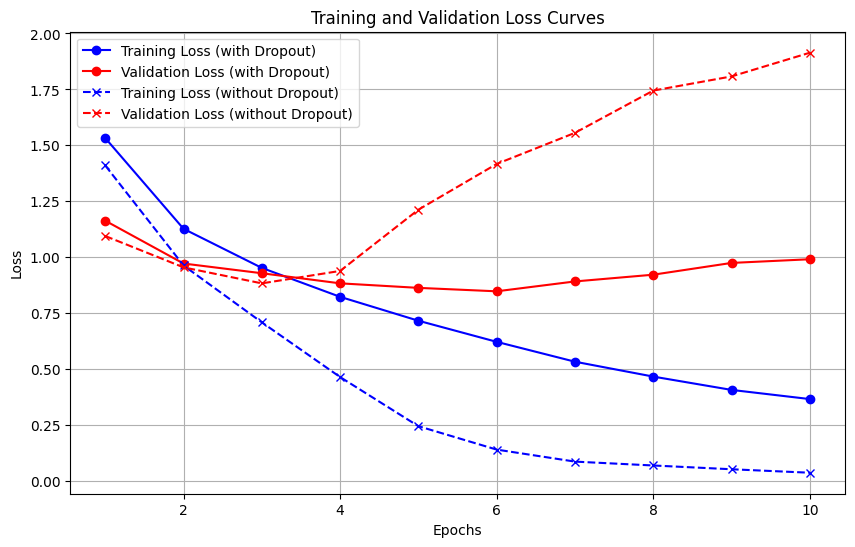

In [40]:
plot_loss_curves(
    train_losses_dropout, val_losses_dropout,
    train_losses_no_dropout, val_losses_no_dropout,
    N_EPOCHS
)

In [ ]:
s